In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",0)
pd.set_option("display.max_rows", 20)
pd.set_option("display.width", 75)

In [ ]:
# Insert Data
df = pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name= None)

In [ ]:
# Merge seven spreadsheets as one dataset
df_all = pd.concat(df.values())
df_all.reset_index(inplace = True, drop=True)
df_all

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Baltimore Orioles Bullpen Pregame,PEAOB,CP AA-Baltimore Orioles Bullpen Pregame,PDBA,CP DMV- Baltimore,PS9,CP Social- General,2014-05-13,2,31,0,0.000000,0,0.000000
618,50th Reunion,PEZ50,CP AAE-50th Reunion,PDON,CP DMV- On Campus,PS3,CP Social- Emeriti,2014-05-21,76,67,0,0.000000,27,0.355263
619,Ring Ceremony,PEZRC,CP AAE-Ring Ceremony,PDON,CP DMV- On Campus,PSS,CP Social- Students,2014-05-21,68,29,0,0.000000,4,0.058824
620,Terps on the Hill,PEZTH,CP AAE-Terps on the Hill,PDDC,CP DMV- Washington DC,PD9,CP Advocacy- General,2014-06-12,118,34,0,0.000000,16,0.135593


In [ ]:
# Check missing values
df_all.isna().sum()

Event Name                         0
Activity Code                      0
Activity Description               0
Location Code                      0
Location Description               0
Group Code                         0
Group Description                  0
Event Date                         0
Participated                       0
Average Age                        0
First Time Attendees               0
Percentage First Time Attendees    0
Major Prospects                    0
Percentage Major Prospect          0
dtype: int64

In [ ]:
# Report all descriptive statistics
df_all.describe()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,44.803859,40.117363,13.456592,0.276282,5.966238,0.102214
std,93.165049,9.741459,41.103936,0.242273,14.123466,0.131444
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,33.000000,1.000000,0.068523,0.000000,0.000000
50%,20.000000,40.000000,4.000000,0.237327,1.000000,0.058824
75%,44.750000,46.000000,11.000000,0.444444,5.000000,0.166667
max,1657.000000,75.000000,702.000000,1.000000,131.000000,0.818182


Participated                          AxesSubplot(0.125,0.749828;0.110714x0.130172)
Average Age                        AxesSubplot(0.257857,0.749828;0.110714x0.130172)
First Time Attendees               AxesSubplot(0.390714,0.749828;0.110714x0.130172)
Percentage First Time Attendees    AxesSubplot(0.523571,0.749828;0.110714x0.130172)
Major Prospects                    AxesSubplot(0.656429,0.749828;0.110714x0.130172)
Percentage Major Prospect          AxesSubplot(0.789286,0.749828;0.110714x0.130172)
dtype: object

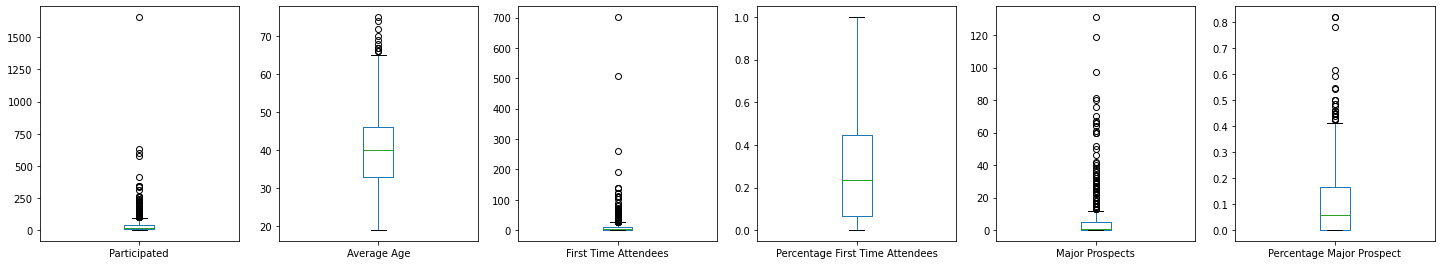

In [ ]:
# data dispersion description by boxplot
df_all.plot(kind='box', 
             subplots=True, 
             layout=(5,6), 
             sharex=False, 
             sharey=False, 
             figsize=(25,25))

In [ ]:
# Check Data Correlation
df_all.corr('pearson')

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
Participated,1.000000,0.037616,0.835996,0.047840,0.658973,0.113415
Average Age,0.037616,1.000000,-0.048204,-0.152633,0.308342,0.549320
First Time Attendees,0.835996,-0.048204,1.000000,0.281961,0.420884,0.051069
Percentage First Time Attendees,0.047840,-0.152633,0.281961,1.000000,0.000751,0.067701
Major Prospects,0.658973,0.308342,0.420884,0.000751,1.000000,0.481370
Percentage Major Prospect,0.113415,0.549320,0.051069,0.067701,0.481370,1.000000


In [1]:
# The heatmap
#sns.heatmap(df_all.corr(),square=True,cmap="Greens") 
plt.figure(figsize = (11,5))
sns.heatmap(dp.corr(), 
            cmap='RdBu_r',
            annot=True,
            linewidth=1)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'Heatmap'.upper()
plt.title(title)
plt.show()

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

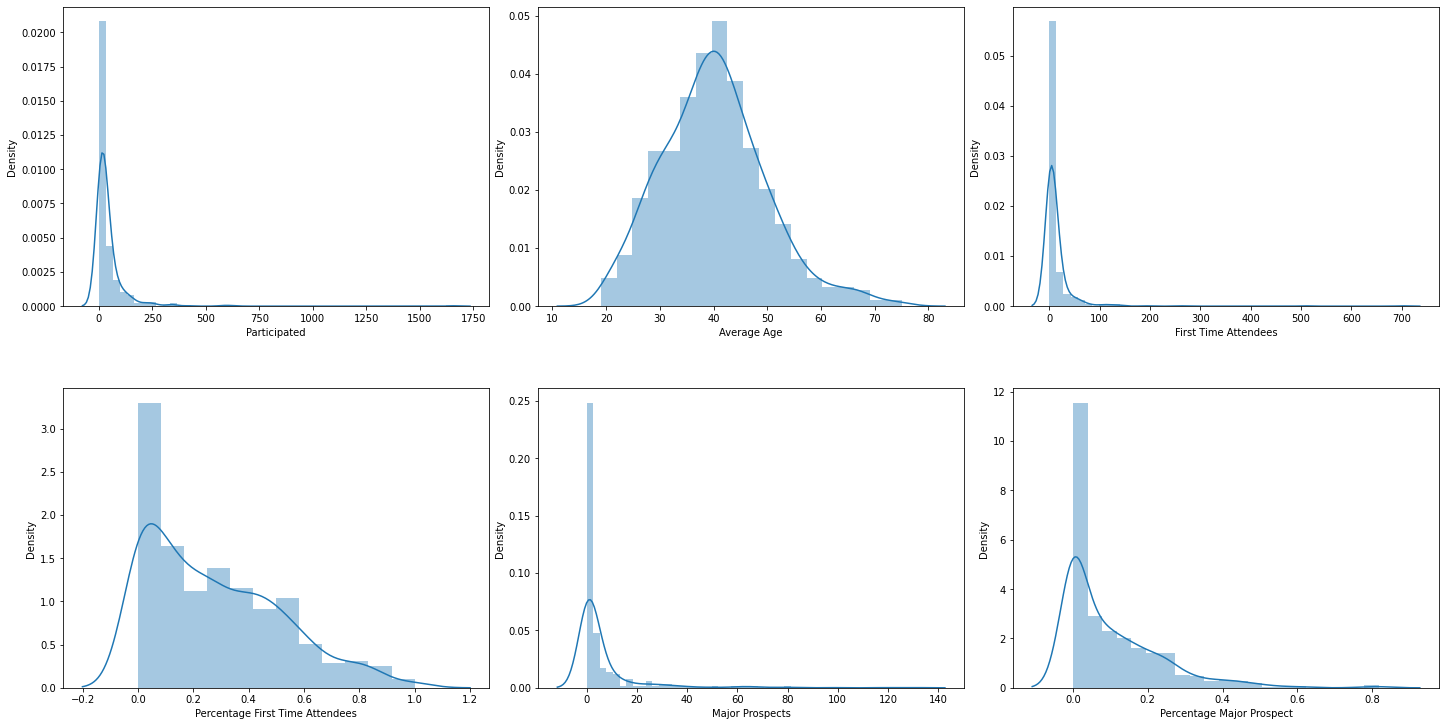

In [ ]:
# Plot density of each numeric column
df3 = pd.DataFrame(df_all,columns=['Participated', 'Average Age', 'First Time Attendees','Percentage First Time Attendees', 'Major Prospects', 'Percentage Major Prospect'])

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df3.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Seprate Event date to Year, Month, Day
df_all['Year'] = df_all['Event Date'].dt.year 
df_all['Month'] = df_all['Event Date'].dt.month
df_all['Day'] = df_all['Event Date'].dt.day 
df_all[['Event Date','Year','Month', 'Day']]

,Event Date,Year,Month,Day
0,2019-07-06,2019,7,6
1,2019-07-10,2019,7,10
2,2019-07-11,2019,7,11
3,2019-07-11,2019,7,11
4,2019-07-14,2019,7,14
...,...,...,...,...
617,2014-05-13,2014,5,13
618,2014-05-21,2014,5,21
619,2014-05-21,2014,5,21
620,2014-06-12,2014,6,12


In [ ]:
# Add Average Age Groups
age = df_all['Average Age']

list = []
for i in age:
    if i <= 30:
        list.append('19-30')
    elif 31 <= i <= 40:
        list.append('31-40')
    elif 41<= i <= 50:
        list.append('41-50')
    elif 51 <= i <= 60:
        list.append('51-60')
    elif 61 <= i <= 70:
        list.append('61-70')
    else:
        list.append('70-75')

df_all['Age Group'] = list

df_all[['Average Age', 'Age Group']]

,Average Age,Age Group
0,52,51-60
1,56,51-60
2,45,41-50
3,34,31-40
4,38,31-40
...,...,...
617,31,31-40
618,67,61-70
619,29,19-30
620,34,31-40


In [ ]:
grouped1 = df_all.groupby(['Age Group'], as_index = False).sum()

grouped1['Percentage First Time Attendees'] = (grouped1['First Time Attendees']/grouped1['Participated'])
grouped1['Percentage Major Prospect'] = (grouped1['Major Prospects']/grouped1['Participated'])

grouped1

,Age Group,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Year,Month,Day
0,19-30,4493,2871,2167,0.482306,33,0.007345,217876,675,1470
1,31-40,7099,8100,1857,0.261586,632,0.089027,451865,1469,3391
2,41-50,11936,9293,3260,0.273123,1793,0.150218,419612,1307,3093
3,51-60,3668,3297,918,0.250273,1010,0.275354,123030,400,1007
4,61-70,602,1171,146,0.242525,217,0.360465,36308,107,297
5,70-75,70,221,22,0.314286,26,0.371429,6052,21,34


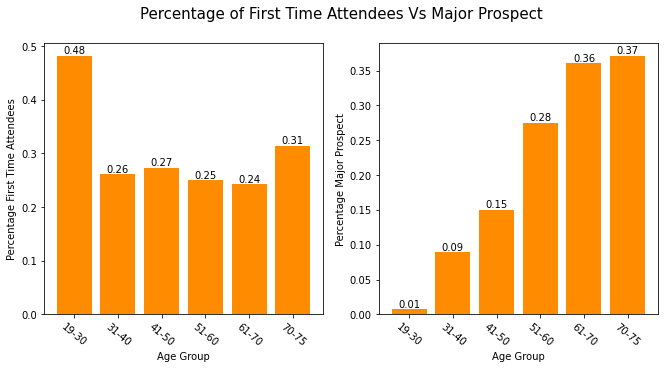

In [ ]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.bar(grouped1["Age Group"],grouped1["Percentage First Time Attendees"], facecolor = 'darkorange')
plt.xlabel("Age Group")
plt.ylabel("Percentage First Time Attendees") 
plt.xticks(grouped1["Age Group"],rotation=-40)

xa=np.arange(len(grouped1.index))
ya1=np.array(grouped1['Percentage First Time Attendees'])

for a,b in zip(xa,ya1): 
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)


plt.subplot(122)
plt.bar(grouped1["Age Group"],grouped1["Percentage Major Prospect"], facecolor = 'darkorange')
plt.xlabel("Age Group")
plt.ylabel("Percentage Major Prospect") 
plt.xticks(grouped1["Age Group"],rotation=-40)

x=np.arange(len(grouped1.index))
ya2=np.array(grouped1['Percentage Major Prospect'])

for a,b in zip(xa,ya2): 
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)


plt.suptitle('Percentage of First Time Attendees Vs Major Prospect', fontsize = 15)
plt.show()

In [ ]:
grouped2 = df_all.groupby(['Month'], as_index = False).sum()

grouped2['Percentage First Time Attendees'] = (grouped2['First Time Attendees']/grouped2['Participated'])
grouped2['Percentage Major Prospect'] = (grouped2['Major Prospects']/grouped2['Participated'])

grouped2

,Month,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Year,Day
0,1,1136,1393,278,0.244718,88,0.077465,72640,675
1,2,2072,2773,580,0.279923,309,0.149131,133152,1117
2,3,2269,2961,683,0.301014,297,0.130895,151304,1196
3,4,5325,3204,1610,0.302347,626,0.117559,167446,1245
4,5,2063,1572,868,0.420746,293,0.142026,74617,519
5,6,1872,1511,399,0.213141,221,0.118056,76672,507
6,7,2154,797,824,0.382544,165,0.076602,38343,284
7,8,779,1113,234,0.300385,53,0.068036,58513,421
8,9,1772,2162,681,0.384312,339,0.191309,108928,765
9,10,4374,3366,1101,0.251715,721,0.164838,165409,1371


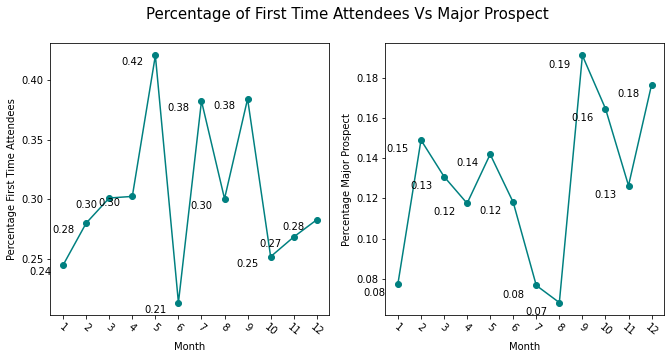

In [ ]:
plt.figure(figsize = (11,5))
plt.subplot(121)

plt.plot(grouped2["Month"],grouped2["Percentage First Time Attendees"], marker='o', color = 'teal')
plt.xlabel("Month")
plt.ylabel("Percentage First Time Attendees") 
plt.xticks(grouped2["Month"],rotation=-40)

xm=np.arange(len(grouped2.index))
ym1=np.array(grouped2['Percentage First Time Attendees'])

for a,b in zip(xm,ym1): 
    plt.text(a,b-0.01,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)


plt.subplot(122)
plt.plot(grouped2["Month"],grouped2["Percentage Major Prospect"], marker='o',color = 'teal')
plt.xlabel("Month")
plt.ylabel("Percentage Major Prospect") 
plt.xticks(grouped2["Month"],rotation=-40)

xm=np.arange(len(grouped2.index))
ym2=np.array(grouped2['Percentage Major Prospect'])

for a,b in zip(xm,ym2): 
    plt.text(a,b-0.007,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)

plt.suptitle('Percentage of First Time Attendees Vs Major Prospect', fontsize = 15)
plt.show()

In [ ]:
grouped3 = df_all.groupby(['Location Code'], as_index = False).sum()
grouped3['Percentage First Time Attendees'] = (grouped3['First Time Attendees']/grouped3['Participated'])
grouped3['Percentage Major Prospect'] = (grouped3['Major Prospects']/grouped3['Participated'])

grouped3

,Location Code,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Year,Month,Day
0,P9NA,67,163,24,0.358209,11,0.164179,8060,16,73
1,PDAN,799,610,155,0.193992,101,0.126408,30247,69,255
2,PDBA,1627,1893,369,0.226798,179,0.110018,104906,348,765
3,PDBR,51,224,5,0.098039,3,0.058824,10091,32,59
4,PDCP,45,41,4,0.088889,5,0.111111,2019,8,22
...,...,...,...,...,...,...,...,...,...,...
40,PWOC,18,43,5,0.277778,2,0.111111,2018,3,24
41,PWSD,85,254,14,0.164706,3,0.035294,12111,42,85
42,PWSE,262,1101,67,0.255725,15,0.057252,60546,188,396
43,PWSF,460,774,119,0.258696,103,0.223913,44386,112,383


In [ ]:
a = grouped3.sort_values(['Percentage First Time Attendees'], ascending = False)
a1 = a.iloc[:6]
b = grouped3.sort_values(['Percentage Major Prospect'], ascending = False)
b1 = b.iloc[:6]

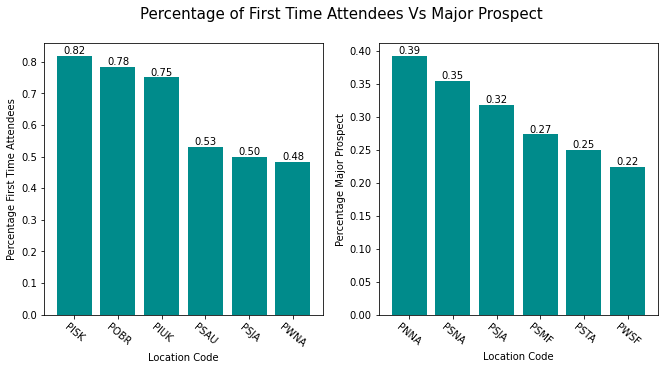

In [ ]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.bar(a1["Location Code"],a1["Percentage First Time Attendees"], facecolor = 'darkcyan')
plt.xlabel("Location Code")
plt.ylabel("Percentage First Time Attendees") 
plt.xticks(a1["Location Code"],rotation=-40)

xl1=np.arange(len(a1.index))
yl1=np.array(a1['Percentage First Time Attendees'])

for a,b in zip(xl1,yl1): 
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)
    
plt.subplot(122)
plt.bar(b1["Location Code"],b1["Percentage Major Prospect"], facecolor = 'darkcyan')
plt.xlabel("Location Code")
plt.ylabel("Percentage Major Prospect") 
plt.xticks(b1["Location Code"],rotation=-40)

xl2=np.arange(len(b1.index))
yl2=np.array(b1['Percentage Major Prospect'])

for a,b in zip(xl2,yl2): 
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)

plt.suptitle('Percentage of First Time Attendees Vs Major Prospect', fontsize = 15)
plt.show()

In [ ]:
grouped4 = df_all.groupby(['Group Code'], as_index = False).sum()
grouped4['Percentage First Time Attendees'] = (grouped4['First Time Attendees']/grouped4['Participated'])
grouped4['Percentage Major Prospect'] = (grouped4['Major Prospects']/grouped4['Participated'])

grouped4

,Group Code,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Year,Month,Day
0,P99,54,219,35,0.648148,19,0.351852,8072,37,75
1,PA9,5714,5254,1680,0.294015,966,0.169058,258157,808,1916
2,PAB,98,82,54,0.551020,7,0.071429,4033,21,19
3,PAG,56,164,16,0.285714,10,0.178571,6050,16,63
4,PAY,32,25,14,0.437500,0,0.000000,2018,10,27
...,...,...,...,...,...,...,...,...,...,...
44,PUB,19,86,6,0.315789,0,0.000000,4035,15,6
45,PUL,21,26,13,0.619048,0,0.000000,2017,10,7
46,PUU,76,25,7,0.092105,0,0.000000,2018,10,26
47,PUZ,10,21,2,0.200000,0,0.000000,2018,4,30


In [ ]:
c = grouped4.sort_values(['Percentage First Time Attendees'], ascending = False)
c1 = c[0:6]
d = grouped4.sort_values(['Percentage Major Prospect'], ascending = False)
d1 = d[0:6]

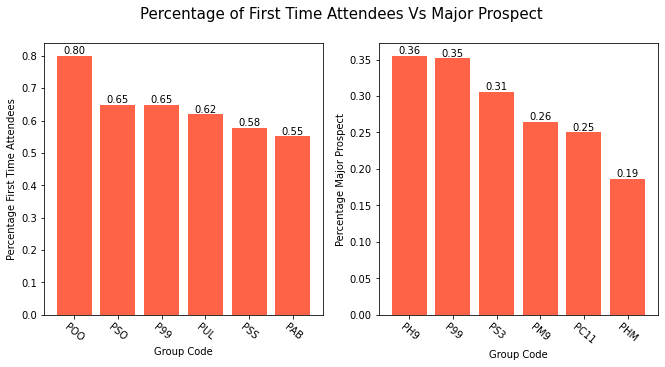

In [ ]:
plt.figure(figsize = (11,5))

plt.subplot(121)

plt.bar(c1["Group Code"],c1["Percentage First Time Attendees"], facecolor = 'tomato')
plt.xlabel("Group Code")
plt.ylabel("Percentage First Time Attendees") 
plt.xticks(c1["Group Code"],rotation=-40)

xg1=np.arange(len(c1.index))
yg1=np.array(c1['Percentage First Time Attendees'])

for a,b in zip(xg1,yg1): 
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)
    

plt.subplot(122)
plt.bar(d1["Group Code"],d1["Percentage Major Prospect"], facecolor = 'tomato')
plt.xlabel("Group Code")
plt.ylabel("Percentage Major Prospect") 
plt.xticks(d1["Group Code"],rotation=-40)

xg2=np.arange(len(d1.index))
yg2=np.array(d1['Percentage Major Prospect'])

for a,b in zip(xg2,yg2): 
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)

plt.suptitle('Percentage of First Time Attendees Vs Major Prospect', fontsize = 15)
plt.show()

In [ ]:
grouped5 = df_all.groupby(['Activity Code'], as_index = False).sum()
grouped5['Percentage First Time Attendees'] = (grouped5['First Time Attendees']/grouped5['Participated'])
grouped5['Percentage Major Prospect'] = (grouped5['Major Prospects']/grouped5['Participated'])

grouped5

,Activity Code,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Year,Month,Day
0,PE788,98,195,32,0.326531,46,0.469388,8056,40,90
1,PEA1H,27,31,3,0.111111,0,0.000000,2019,4,4
2,PEA1M,17,30,0,0.000000,0,0.000000,2019,11,13
3,PEA1X,24,44,1,0.041667,2,0.083333,2019,3,12
4,PEA2N,46,74,1,0.021739,2,0.043478,4038,16,27
...,...,...,...,...,...,...,...,...,...,...
336,PEZTD,109,43,29,0.266055,29,0.266055,2017,3,10
337,PEZTH,617,147,122,0.197731,67,0.108590,8066,25,56
338,PEZTI,142,52,46,0.323944,60,0.422535,2016,3,10
339,PEZTO,59,43,26,0.440678,15,0.254237,2015,3,13


In [ ]:
e = grouped5.sort_values(['Percentage First Time Attendees'], ascending = False)
e1 = e[0:6]
f = grouped5.sort_values(['Percentage Major Prospect'], ascending = False)
f1 = f[0:6]

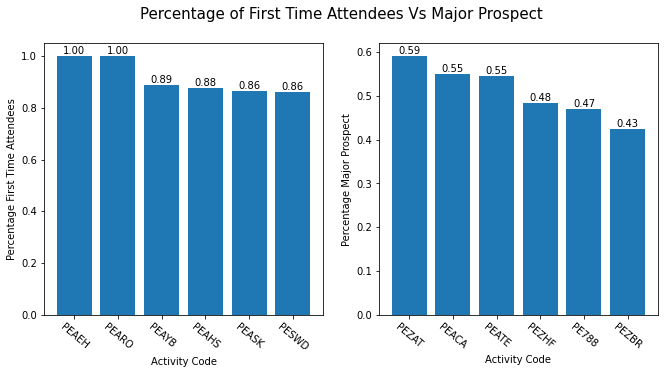

In [ ]:
plt.figure(figsize = (11,5))

plt.subplot(121)

plt.bar(e1["Activity Code"],e1["Percentage First Time Attendees"])
plt.xlabel("Activity Code")
plt.ylabel("Percentage First Time Attendees") 
plt.xticks(e1["Activity Code"],rotation=-40)

xa1=np.arange(len(e1.index))
ya1=np.array(e1['Percentage First Time Attendees'])

for a,b in zip(xa1,ya1): 
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)

plt.subplot(122)

plt.bar(f1["Activity Code"],f1["Percentage Major Prospect"])
plt.xlabel("Activity Code")
plt.ylabel("Percentage Major Prospect") 
plt.xticks(f1["Activity Code"],rotation=-40)

xa2=np.arange(len(f1.index))
ya2=np.array(f1['Percentage Major Prospect'])

for a,b in zip(xa2,ya2): 
    plt.text(a,b,'%.2f'%b,ha = 'center',va = 'bottom',fontsize=10)

plt.suptitle('Percentage of First Time Attendees Vs Major Prospect', fontsize = 15)
plt.show()